In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df1 = pd.read_csv("./exercise.csv")
df2 = pd.read_csv("./calories.csv")

In [6]:
print(df1.shape)
df1.head()

(15000, 8)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


It (exercise.csv) has 15000 rows and 8 columns.

In [7]:
print(df2.shape)
df2.head()

(15000, 2)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


It (calories.csv) has 1500 rows and 2 columns

In [8]:
df1['User_ID'].equals(df2['User_ID'])

True

df1 and df2 dataset contain same users data. so we can concat these two data frames into one.

In [9]:
df = pd.concat([df1, df2], axis = 1)

In [10]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [11]:
df.shape

(15000, 10)

Dataset has 15000 rows and 10 columns.

In [12]:
df.drop(columns = 'User_ID', axis = 1, inplace = True)

# Dealing with duplicate values.

In [13]:
df.duplicated().sum()

1

This data set doesn't contain any duplicate value.

# Dealing with null values.

In [14]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

This data set doesn't contain any null value.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [16]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [17]:
a = list(df.columns) 
n = list(df._get_numeric_data())
c = list(set(a) - set(n))

print("All features : ")
print(a)
print("\nNumerical features :")
print(n)
print("\n categorical features :")
print(c)

All features : 
['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

Numerical features :
['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

 categorical features :
['Gender']


# Dealing with outliers

In [18]:
def plot (n):
    for i in n:
        sns.set()
        plt.figure(figsize = (14, 2))
        plt.title(i)
        sns.boxplot(x = i, data = df)
        plt.show()

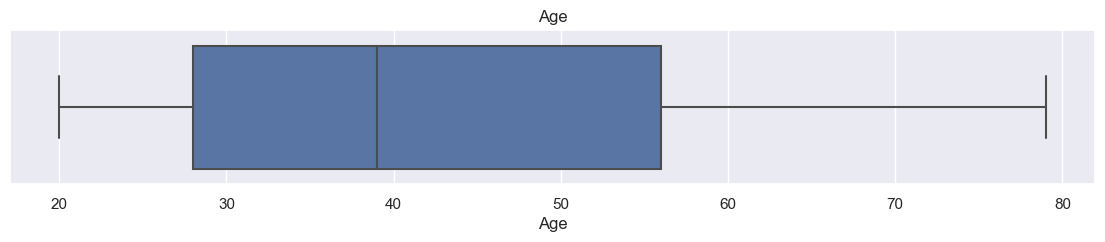

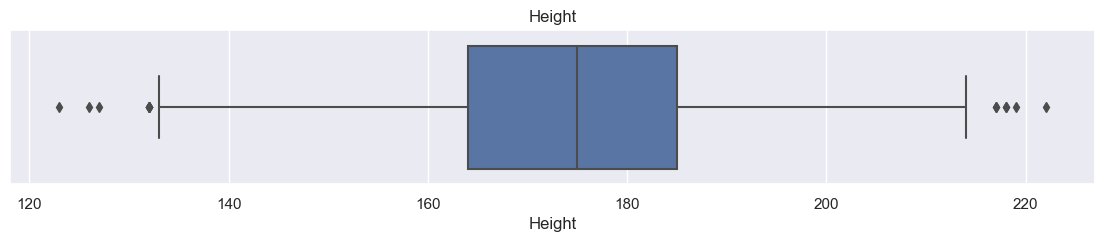

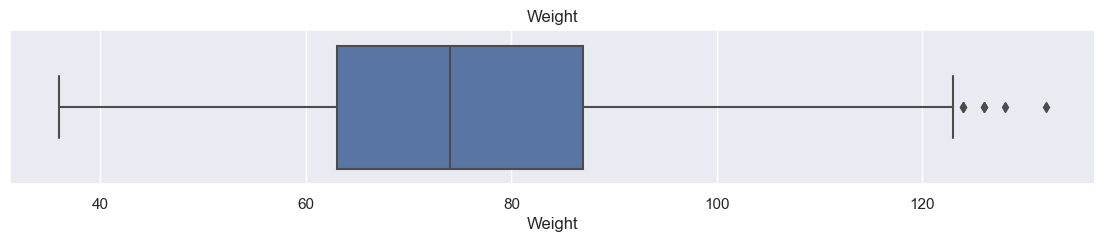

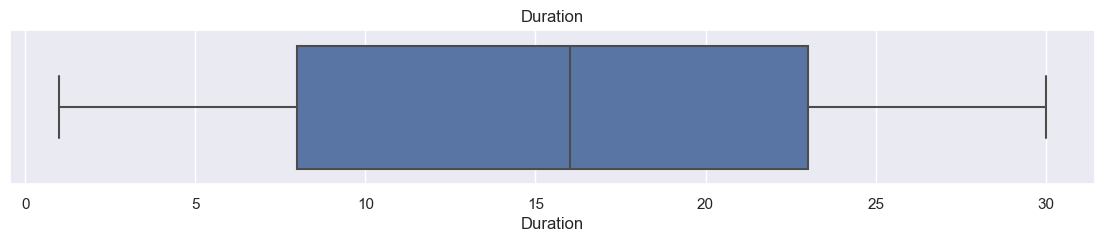

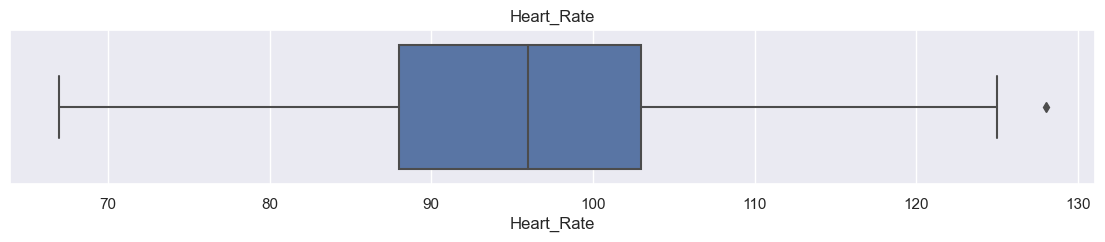

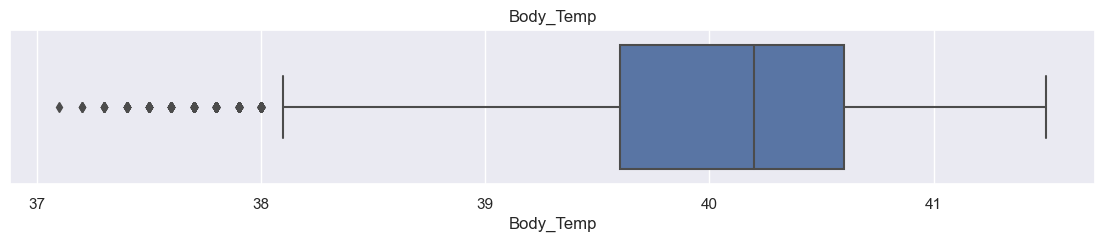

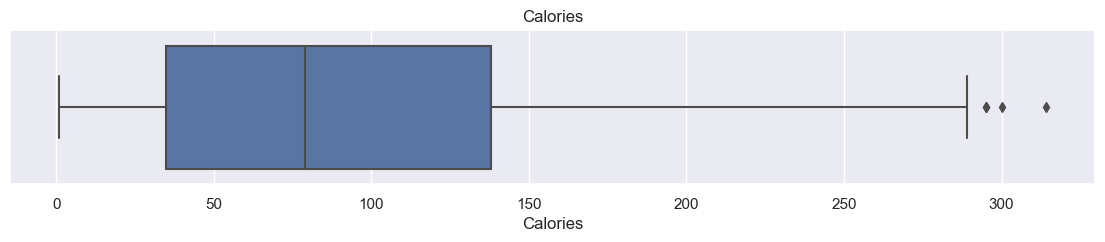

In [19]:
plot(n)

In [20]:
for i in n:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    df.loc[(df[i] <= lower), i] = lower
    df.loc[(df[i] >= upper), i] = upper

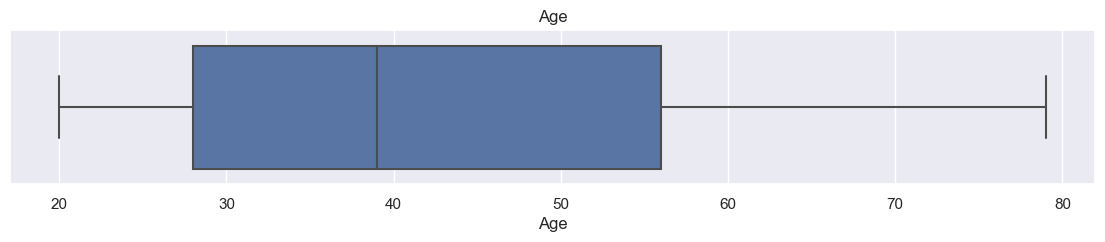

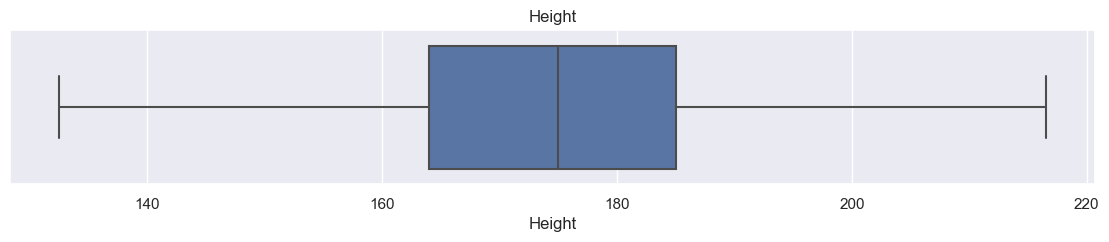

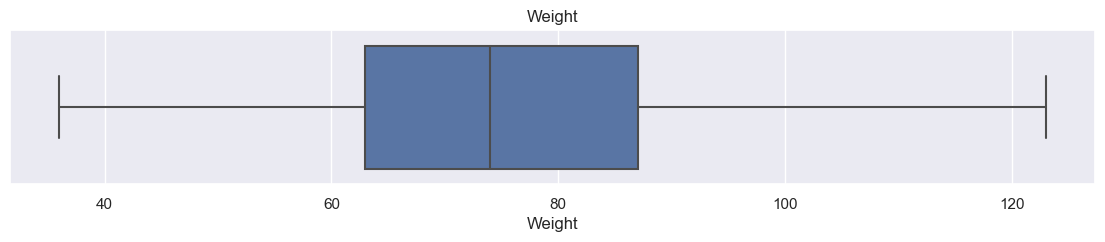

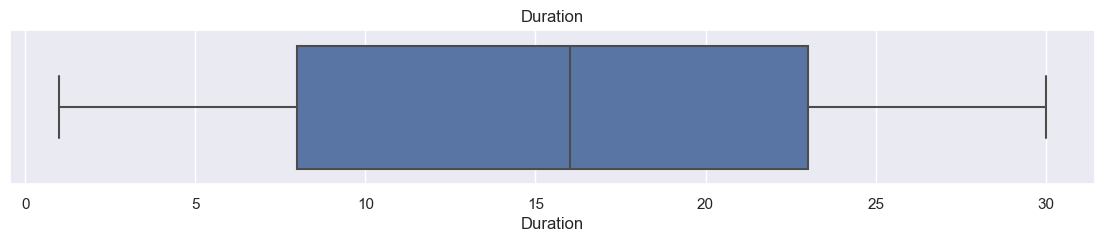

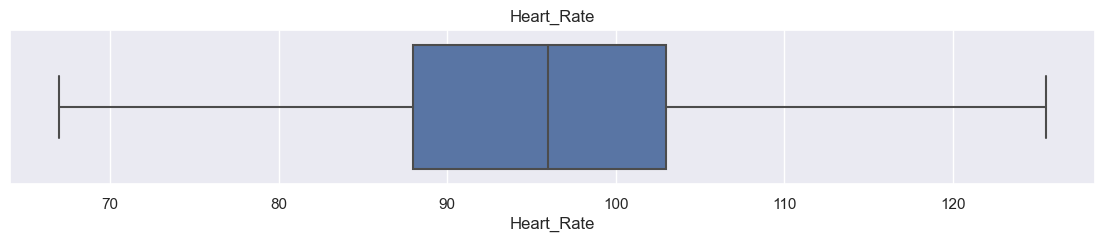

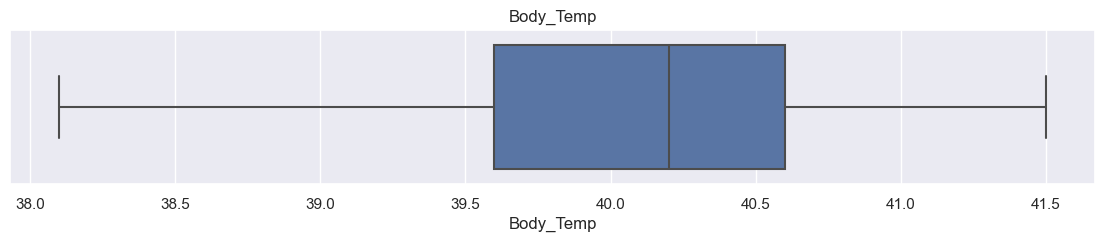

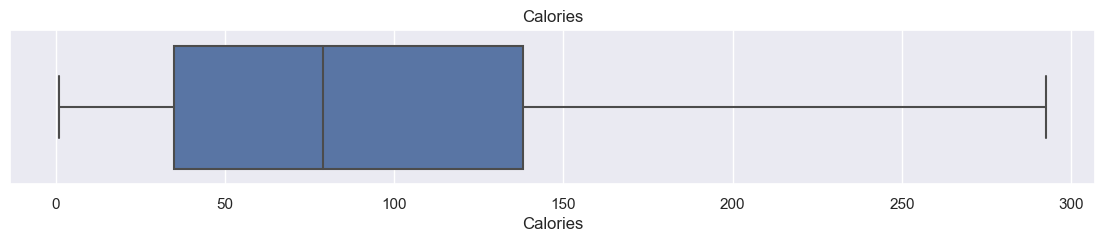

In [21]:
plot(n)

<Figure size 2000x2000 with 0 Axes>

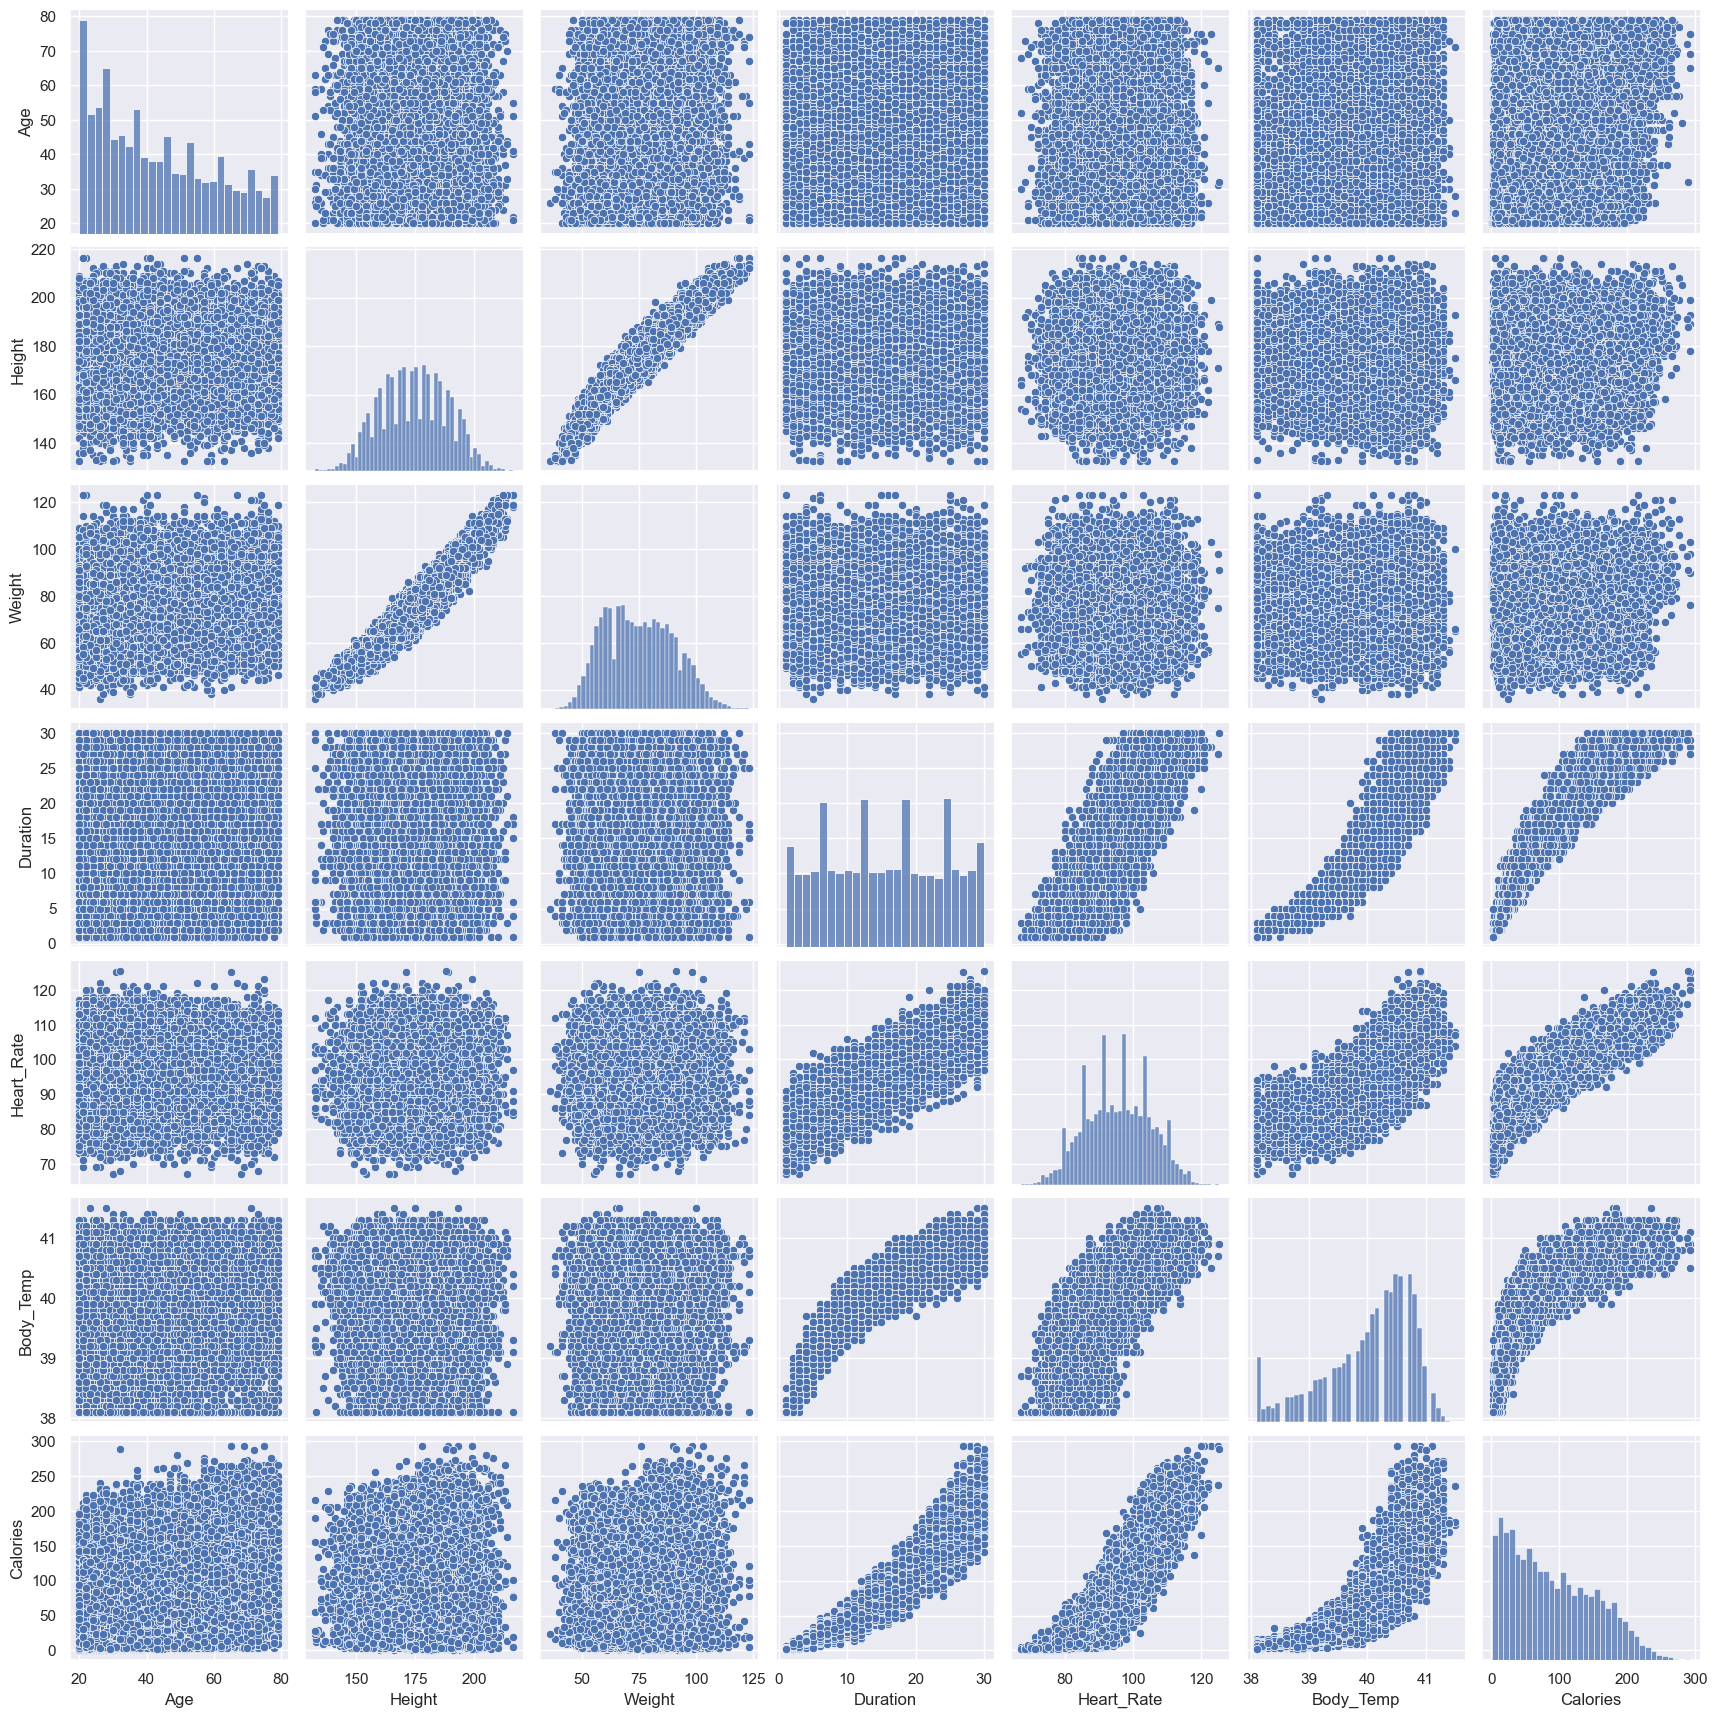

In [56]:
sns.set()
plt.figure(figsize = (20, 20))
sns.pairplot(data = df)
plt.show()

# Split data

In [37]:
x = df.drop(columns = 'Calories', axis = 1)
y = df['Calories']

In [38]:
print(x.shape)
x.head()

(15000, 7)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [39]:
print(y.shape)
y.head()

(15000,)


0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

# Correlation of data

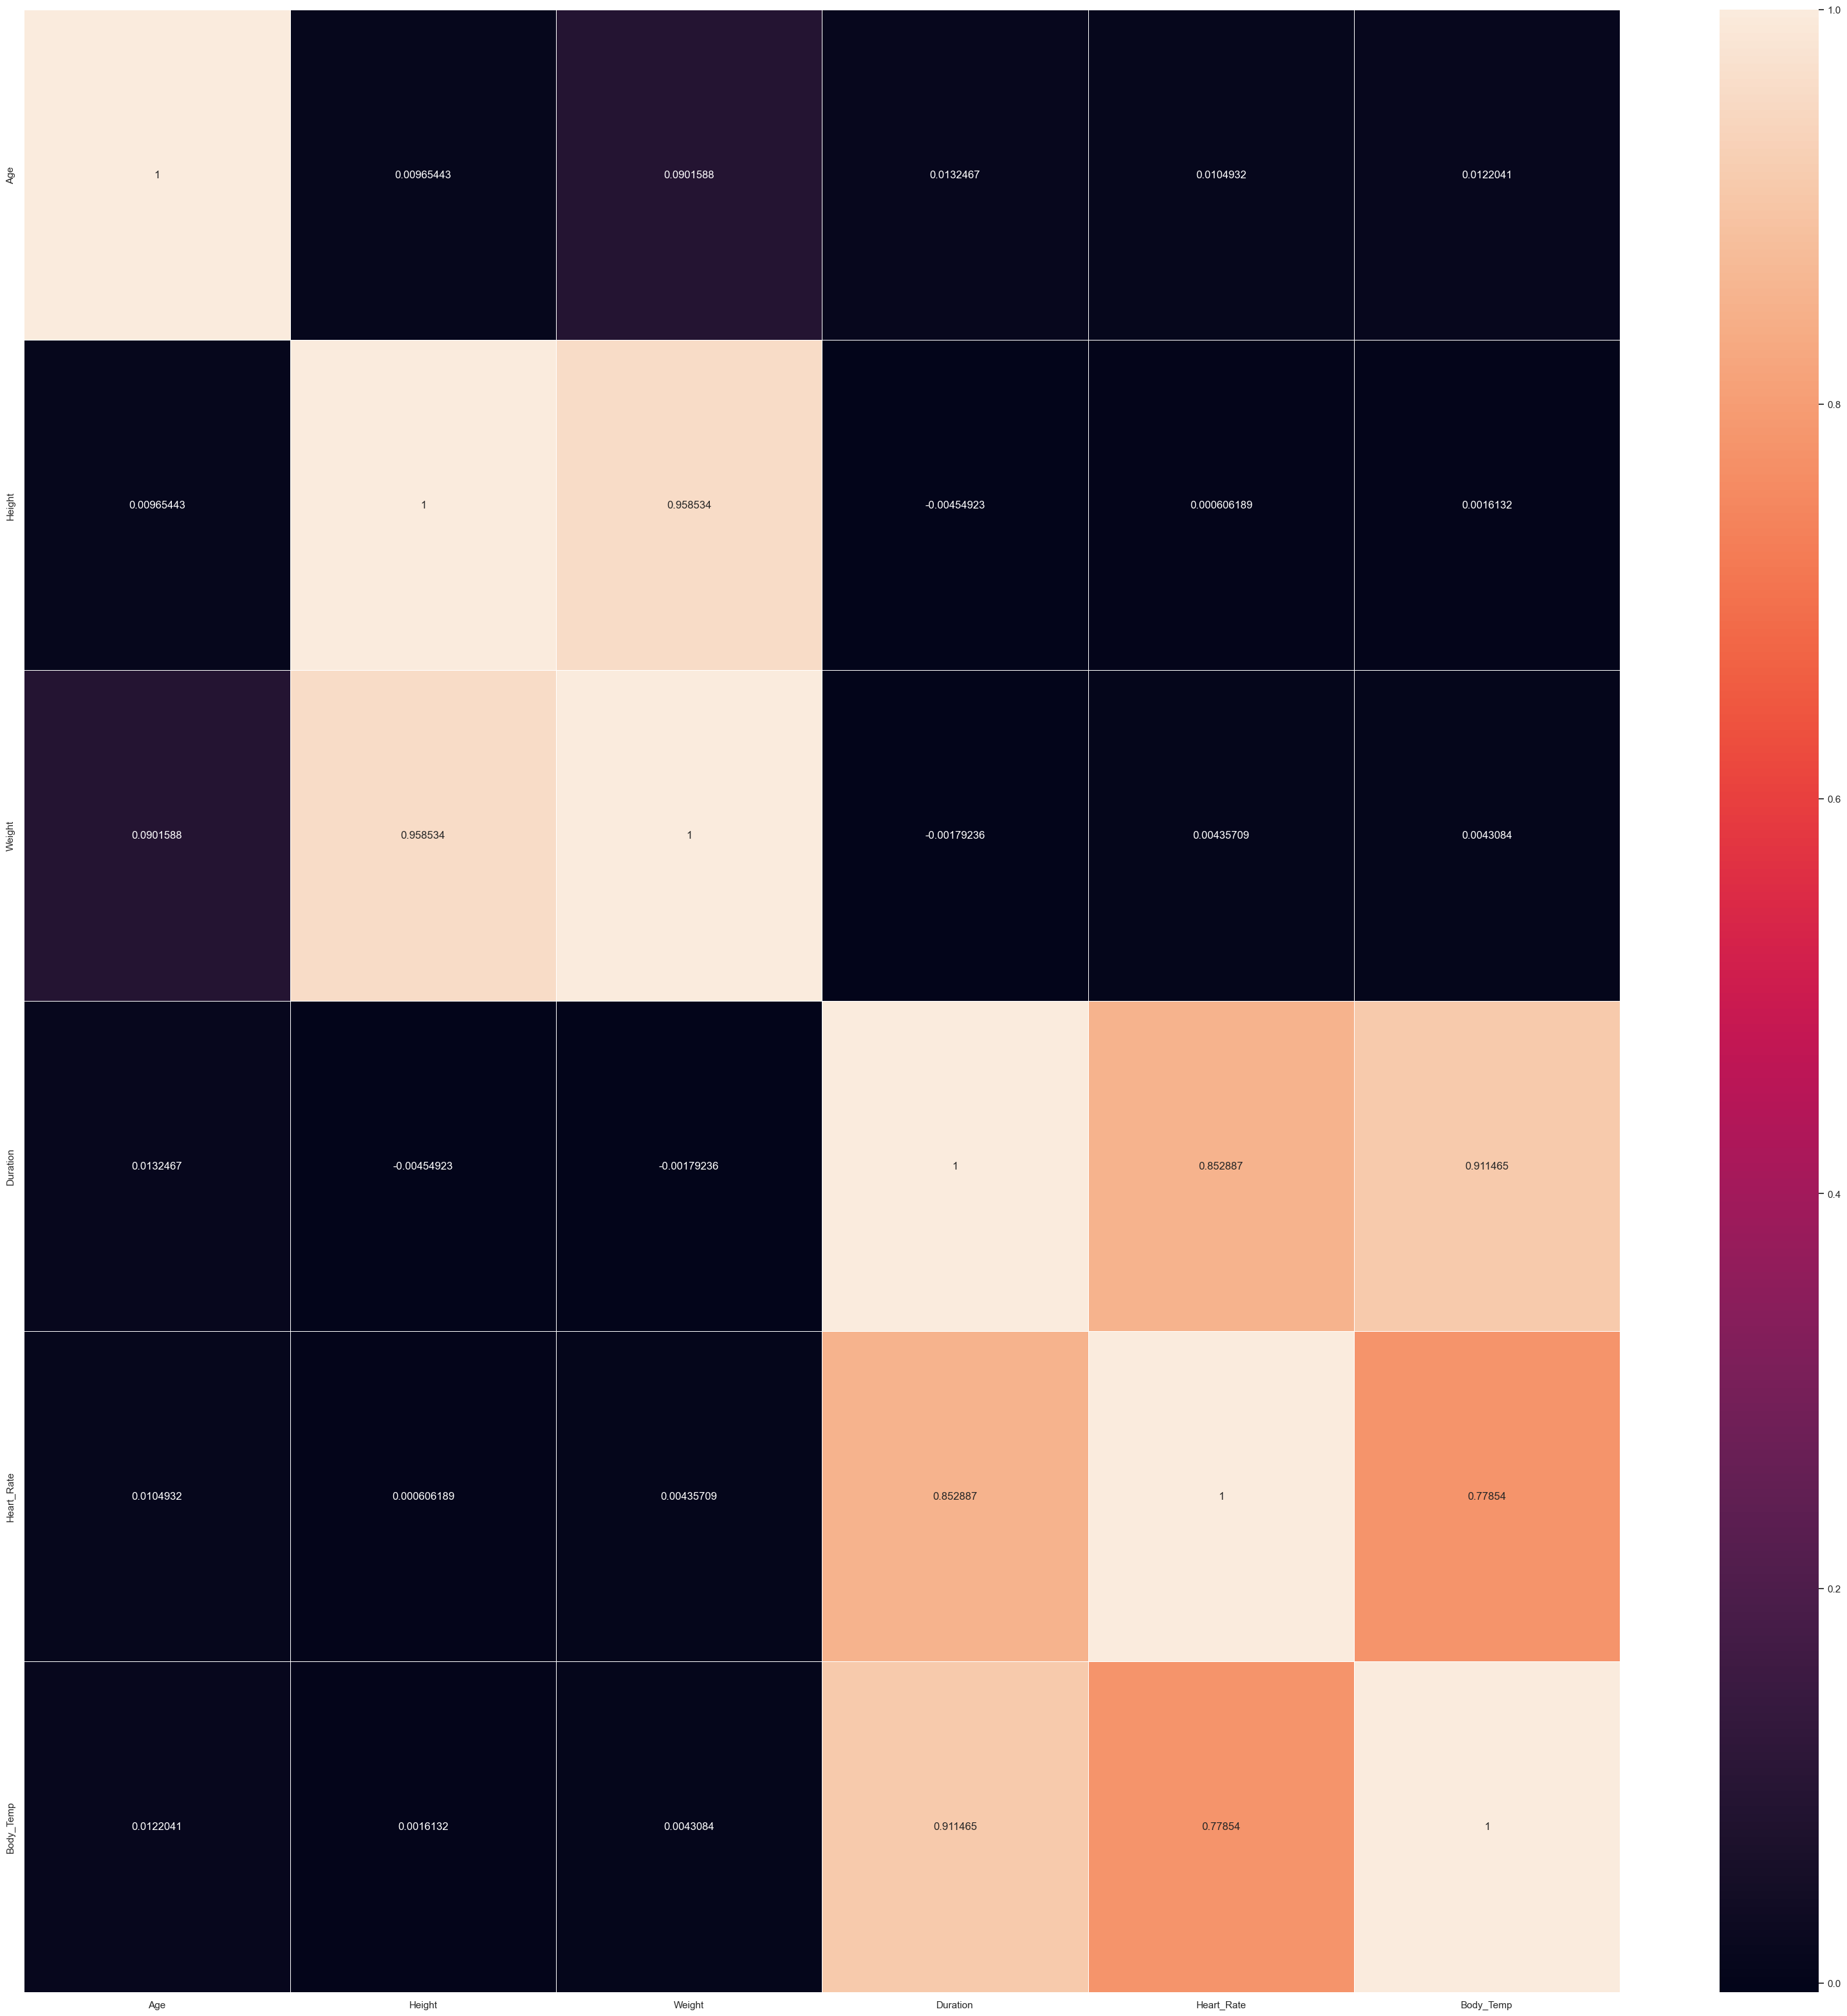

In [40]:
sns.set()
plt.figure(figsize = (40, 40))
sns.heatmap(x.corr(), annot = True, linewidths = 0.6, fmt = 'g')
plt.show()

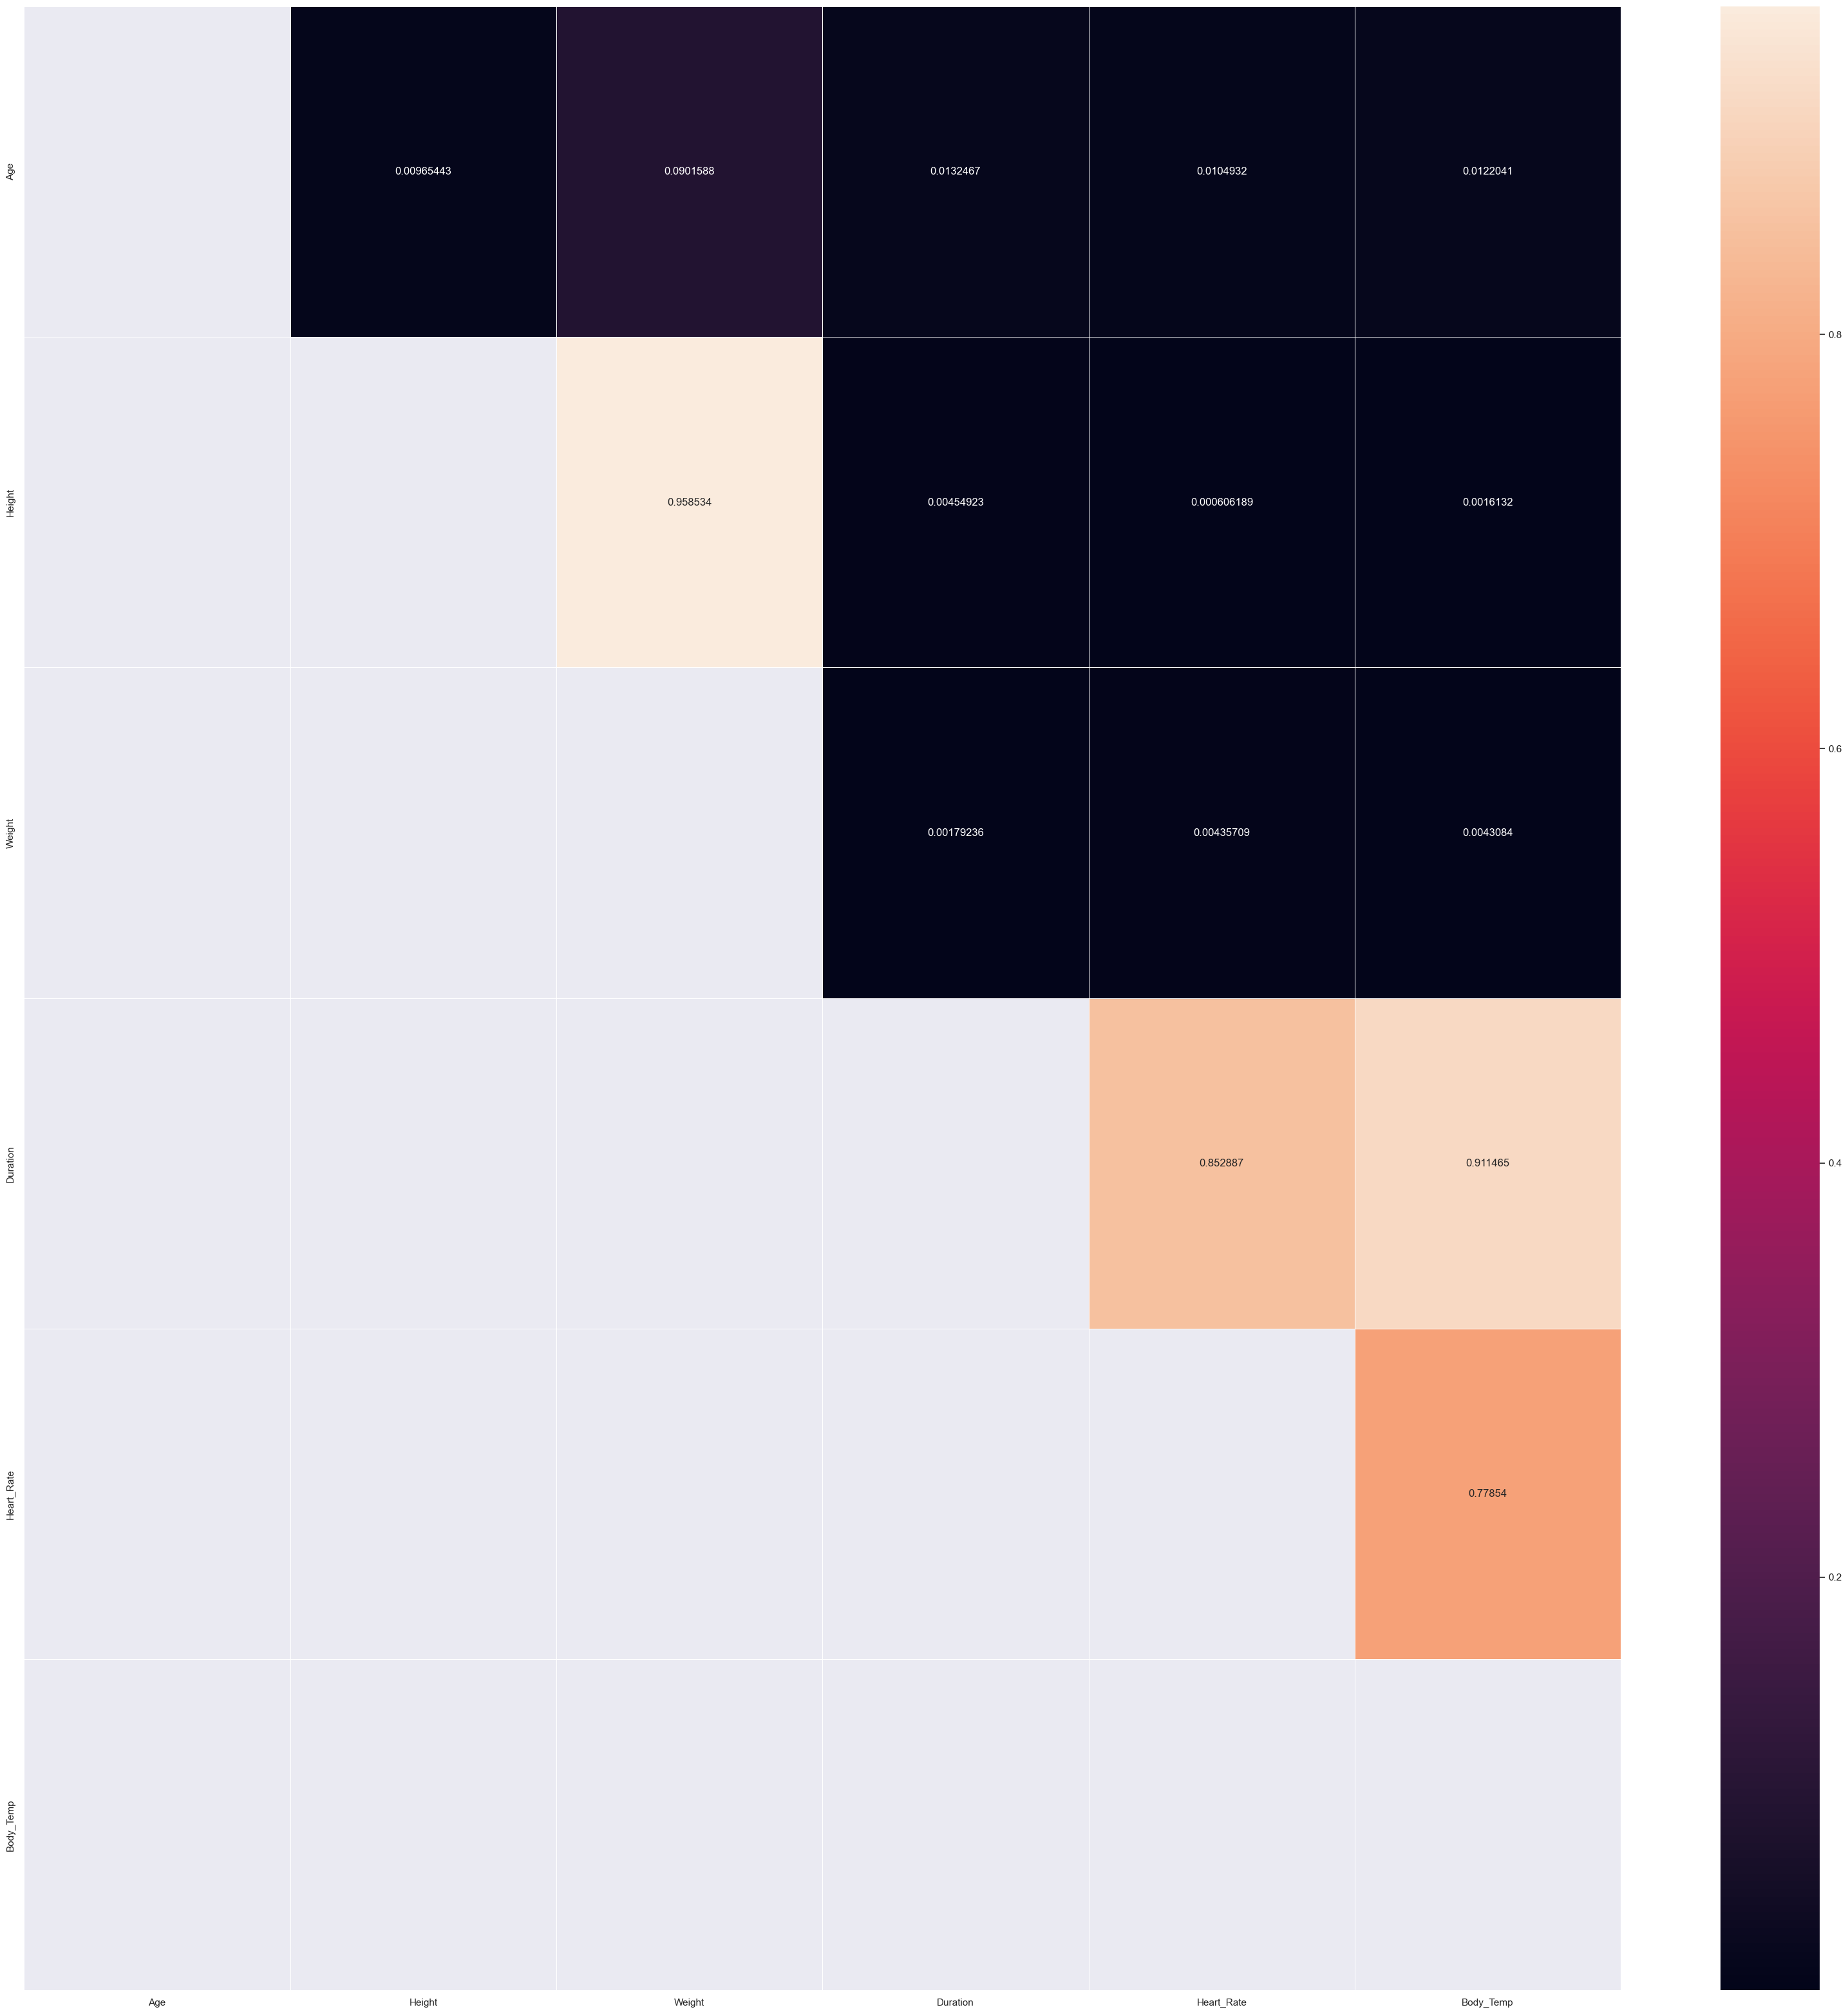

In [41]:
corr = x.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

sns.set()
plt.figure(figsize = (40, 40))
sns.heatmap(upper, annot = True, linewidths = 0.6, fmt = 'g')
plt.show()

In [42]:
to_drop = list(column for column in upper.columns if any(upper[column] > 0.95))

to_drop

['Weight']

In [43]:
x.drop(columns = to_drop, axis=1)
print(x.shape)
x.head()

(15000, 7)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [44]:
x = pd.get_dummies(data = x, columns = ['Gender'])

In [45]:
print(x.shape)
x.head()

(15000, 8)


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,0,1
1,20,166.0,60.0,14.0,94.0,40.3,1,0
2,69,179.0,79.0,5.0,88.0,38.7,0,1
3,34,179.0,71.0,13.0,100.0,40.5,1,0
4,27,154.0,58.0,10.0,81.0,39.8,1,0


# Scaling data

In [46]:
mm = MinMaxScaler()
mm.fit(x)

MinMaxScaler()

In [47]:
x1 = mm.transform(x)
x = pd.DataFrame(data = x1, columns = x.columns, index = x.index)
x.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,0.813559,0.684524,0.666667,0.965517,0.649573,0.794118,0.0,1.0
1,0.000000,0.398810,0.275862,0.448276,0.461538,0.647059,1.0,0.0
2,0.830508,0.553571,0.494253,0.137931,0.358974,0.176471,0.0,1.0
3,0.237288,0.553571,0.402299,0.413793,0.564103,0.705882,1.0,0.0
4,0.118644,0.255952,0.252874,0.310345,0.239316,0.500000,1.0,0.0


# Model building.

## LinearRegression

In [48]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X' : [True, False], 
    'positive' : [True, False], 
    'n_jobs' : [1, 5, 6]
}

In [49]:
model = LinearRegression()
gsc = GridSearchCV(model, param_grid, cv = 5)
gsc.fit(x, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 5, 6],
                         'positive': [True, False]})

In [50]:
print("Best parameters : ")
print(gsc.best_params_)
print("\n Best score :")
print(gsc.best_score_)

Best parameters : 
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

 Best score :
0.9671051254713021


## Lasso Regression

In [51]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],  # Regularization parameter values
    'fit_intercept': [True, False]     # Fit intercept values
}

In [52]:
model = Lasso()
gsc = GridSearchCV(model, param_grid, cv = 5)
gsc.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'fit_intercept': [True, False]})

In [53]:
print("Best parameters : ")
print(gsc.best_params_)
print("\n Best score :")
print(gsc.best_score_)

Best parameters : 
{'alpha': 0.001, 'fit_intercept': False}

 Best score :
0.967104461436676


## K-Neighbors Regressor

In [54]:
param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50]
}

In [55]:
model = KNeighborsRegressor()
gsc = GridSearchCV(model, param_grid, cv = 5)
gsc.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [56]:
print("Best parameters : ")
print(gsc.best_params_)
print("\n Best score :")
print(gsc.best_score_)

Best parameters : 
{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'distance'}

 Best score :
0.995203289618242


## DecisionTree Regressor

In [57]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2']
}

In [58]:
model = DecisionTreeRegressor()
gsc = GridSearchCV(model, param_grid, cv = 5)
gsc.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [59]:
print("Best parameters : ")
print(gsc.best_params_)
print("\n Best score :")
print(gsc.best_score_)

Best parameters : 
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}

 Best score :
0.9933995277709167


## RandomForest Regressor

In [60]:
param_grid = {
    'n_estimators': [100, 200, 500],              
    'max_depth': [None, 5, 10],               
    'max_features': ['auto', 'sqrt', 'log2']     
}

In [61]:
model = RandomForestRegressor()
gsc = GridSearchCV(model, param_grid, cv = 5)
gsc.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [62]:
print("Best parameters : ")
print(gsc.best_params_)
print("\n Best score :")
print(gsc.best_score_)

Best parameters : 
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

 Best score :
0.9980208414662624


## SVR

In [63]:
param_grid = {
    'kernel': ['linear', 'rbf'],            
    'C': [0.1, 1.0],                   
    'epsilon': [0.1, 0.01],          
    'gamma': ['scale', 'auto']              
}

In [64]:
model = SVR()
gsc = GridSearchCV(model, param_grid, cv = 5)
gsc.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1.0], 'epsilon': [0.1, 0.01],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [65]:
print("Best parameters : ")
print(gsc.best_params_)
print("\n Best score :")
print(gsc.best_score_)

Best parameters : 
{'C': 1.0, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}

 Best score :
0.9939516317472729
